## Lumpy Processing 6/11/17

### Processes lumpy with bash commands below (two total commands for each bipolar directory)

Software Version:
python/3.6.1
extract_sv_reads/1.1.2
lumpy-sv/v0.2.13
svtyper/v0.1.4

Computational requirements:
hoffman2 4-core 8gb-ram


## After Running Lumpy check with jobs failed

In [1]:
completed_lumpy_jobs = []
with open('completed_lumpy_jobs.txt') as lumpy:
    for i in lumpy:
        # strip hard path
        x = i.strip('/u/scratch2/c/colinpat/bipolar_lumpy/')
        # strip file extension to get indentifier
        y = x.strip('.lumpy.vcf\n')
        completed_lumpy_jobs.append(y)
        
icnn = []

with open('processed_BAMs_icnn.txt') as lumpy:
    for i in lumpy:
        x = i.strip('\n')
        icnn.append(x)
 

bam_hd = []

with open('processed_BAM_hdd.txt') as lumpy:
    for i in lumpy:
        x = i.strip('\n')
        bam_hd.append(x)
        
lumpy_samples = icnn + bam_hd

print(lumpy_samples)

['LP6005324-DNA_H12', 'LP6005324-DNA_H07', 'LP6005324-DNA_G10', 'LP6005324-DNA_H05', 'LP6005324-DNA_H10', 'LP6005324-DNA_H11', 'LP6005324-DNA_G07', 'LP6005324-DNA_H03', 'LP6005324-DNA_G09', 'LP6005324-DNA_H01', 'LP6005324-DNA_H04', 'LP6005324-DNA_G11', 'LP6005324-DNA_H06', 'LP6005324-DNA_G08', 'LP6005324-DNA_H08', 'LP6005324-DNA_H09', 'LP6005324-DNA_H02', 'LP6005324-DNA_G12', 'LP6005324-DNA_F10', 'LP6005324-DNA_F05', 'LP6005324-DNA_F07', 'LP6005324-DNA_G01', 'LP6005324-DNA_G05', 'LP6005324-DNA_G04', 'LP6005324-DNA_F01', 'LP6005324-DNA_G03', 'LP6005324-DNA_F03', 'LP6005324-DNA_F12', 'LP6005324-DNA_E11', 'LP6005323-DNA_C01', 'LP6005324-DNA_F11', 'LP6005324-DNA_F08', 'LP6005324-DNA_F09', 'LP6005324-DNA_G06', 'LP6005324-DNA_F04', 'LP6005324-DNA_F02', 'LP6005324-DNA_F06', 'LP6005324-DNA_E12', 'LP6005324-DNA_G02', 'LP6005324-DNA_E09', 'LP6005324-DNA_D11', 'LP6005324-DNA_E02', 'LP6005324-DNA_E07', 'LP6005324-DNA_D07', 'LP6005324-DNA_D06', 'LP6005324-DNA_E03', 'LP6005324-DNA_E08', 'LP6005324-D

In [4]:
failed_jobs = []

for i in completed_lumpy_jobs:
    if i not in lumpy_samples:
        failed_jobs.append(i)
        
print(failed_jobs)


[]


In [9]:
working_directory = '/u/scratch2/c/colinpat/bipolar_lumpy/'

failed = ['LP6005646-DNA_E12']

out_file = open('bnd_cleanup.sh', 'w')
#out_file.write('#!/bin/bash\n')
#out_file.write('#$ -V\n')
#out_file.write('#$ -cwd\n')
#out_file.write('#$ -pe shared 1\n')
#out_file.write('#$ -l h_rt=2:00:00\n')
#out_file.write('#$ -l h_data=2G\n')
#out_file.write('## SETUP STORAGE ##\n\n')
#out_file.write('cd ' + working_directory + '\n)
#out_file.write('. /u/local/Modules/default/init/modules.sh\n')
#out_file.write('module load python/3.4\n')
for i in failed:
    out_file.write('python3 /u/home/c/colinpat/Lumpy/bnd_remover.py -i ' + i + '.lumpy.vcf -o ' + i + '.cleaned.lumpy.vcf -d ' + working_directory +'\n')
out_file.close()
               

#### All jobs ran successfully, sort and combine VCF files using lumpy l_sort.py

In [11]:
failed = ['LP6005322-DNA_A03', 'LP6005648-DNA_C04', 'LP6005647-DNA_E06', 'LP6005646-DNA_F01', 'LP6005646-DNA_E12']


working_directory = '/u/scratch2/c/colinpat/bipolar_lumpy/'

lumpy_commands = open('Bipolar_sort.sh', 'w')
lumpy_commands.write('#!/bin/bash\n')
lumpy_commands.write('#$ -V\n')
lumpy_commands.write('#$ -cwd\n')
lumpy_commands.write('#$ -pe shared 4\n')
lumpy_commands.write('#$ -l h_rt=24:00:00\n')
lumpy_commands.write('#$ -l h_data=4G\n')
lumpy_commands.write('## SETUP STORAGE ##\n\n')
lumpy_commands.write('cd ' + working_directory + '\n')
lumpy_commands.write('. /u/local/Modules/default/init/modules.sh\n')
lumpy_commands.write('module load python/2.7.13\n')
lumpy_commands.write('python /u/home/c/colinpat/Lumpy/lumpy-sv-v0.2.13/scripts/l_sort.py ')
                     
for i in completed_lumpy_jobs:
    lumpy_commands.write( i + '.cleaned.lumpy.vcf ')

lumpy_commands.write(' > bipolar.sorted.lumpy.vcf')

lumpy_commands.close()
                     


In [5]:
failed = ['LP6005322-DNA_A03', 'LP6005648-DNA_C04', 'LP6005647-DNA_E06', 'LP6005646-DNA_F01', 'LP6005646-DNA_E12']


for i in failed:
    if i in icnn:
        print('icnn')
    else:
        print('bamhd')

icnn
bamhd
bamhd
bamhd
bamhd


python /u/home/c/colinpat/Lumpy/lumpy-sv-v0.2.13/scripts/l_sort.py LP6005646-DNA_B12.lumpy.vcf LP6005646-DNA_A09.lumpy.vcf .....  LP6005324-DNA_H11.lumpy.vcf  > bipolar.sorted.lumpy.vcf

### Merge Variants Togther, using l_merge.py

In [10]:
working_directory = '/u/scratch2/c/colinpat/bipolar_lumpy/'

lumpy_commands = open('Bipolar_merge.sh', 'w')
lumpy_commands.write('#!/bin/bash\n')
lumpy_commands.write('#$ -V\n')
lumpy_commands.write('#$ -cwd\n')
lumpy_commands.write('#$ -pe shared 4\n')
lumpy_commands.write('#$ -l h_rt=24:00:00\n')
lumpy_commands.write('#$ -l h_data=4G\n')
lumpy_commands.write('## SETUP STORAGE ##\n\n')
lumpy_commands.write('cd ' + working_directory + '\n')
lumpy_commands.write('. /u/local/Modules/default/init/modules.sh\n')
lumpy_commands.write('module load python/2.7.13\n')
lumpy_commands.write('python /u/home/c/colinpat/Lumpy/lumpy-sv-v0.2.13/scripts/l_merge.py -i  bipolar.sorted.lumpy.vcf -f 30 > bipolar.merged.lumpy.vcf')
lumpy_commands.close()

python /u/home/c/colinpat/Lumpy/lumpy-sv-v0.2.13/scripts/l_merge.py -i  bipolar.sorted.lumpy.vcf -f 30 > bipolar.merged.lumpy.vcf

### Merged Variant together as decribed above and typed using svtyper, using the following commands 

### All of the variants are called from a common merged VCF, so all of the VCF files should be the same length. As a quality control measure I am collecting the lengthe of the VCF files to identify truncated files 

### Checking for mendel error

ped file structure
Family ID
Sample ID
Paternal ID
Maternal ID
Sex (1=male; 2=female; other=unknown)
Affection (0=unknown; 1=unaffected; 2=affected)
Genotypes (space or tab separated, 2 for each marker. 0=missing)

In [5]:
# first clean_ped_infomration file and put into PLINK Ped format
ped_info = open('PedStructSeqID.txt')

ped_out = []

ped_info_list = []

sample_info_dict ={}
sample_info_dict['0'] = ['NA', 'NA', 'NA']
sample_info_dict['NA']  = ['NA', 'NA', 'NA']

for count, line in enumerate(ped_info):
    if count > 0:
        line_strip = line.strip('\n')
        line_split = line_strip.split('\t')
        ped_info_list.append(line_split)
        sample_info_dict[line_split[0] + '-' + line_split[1]] = [line_split[0] +  '-' + line_split[2], line_split[0] + '-' + line_split[3], line_split[-1]]
                
for line_split in ped_info_list:
    new_line=[]
    if line_split[-1] != 'NA' and line_split[2] != '0' and line_split[3] != '0':
        sample_list = sample_info_dict[line_split[0] + '-' + line_split[1]]
        father = sample_info_dict[sample_list[0]][-1]
        mother = sample_info_dict[sample_list[1]][-1]
        new_line.append(line_split[0])
        new_line.append(line_split[-1])
        new_line.append(father)
        new_line.append(mother)
        if line_split[4] == 'm':
            new_line.append('1')
        else:
            new_line.append('2')
        new_line.append('0')
        if new_line[2] != 'NA' and new_line[3] != 'NA':
            ped_out.append(new_line)
            
out_file = open('bipolar_family_structure.ped', 'w')

for i in ped_out:
    out_file.write('\t'.join(i) +'\n')  

out_file.close()

print(len(ped_out))
            
            

67


### To speed up quality control, I ran 'tail -n 1 LP6005324-DNA_H12.svtyper.vcf' for every file and exported last line to file


In [38]:
line_coord = []

for i in open('last_line.txt'):
    line_split = i.split('\t')
    line_coord.append([line_split[0],line_split[1]])

most_common = ['chrY', '59013087']    
    
for i in line_coord:
    if i[1] != most_common[1]:
        print(i)
    
    

print(len(line_coord))


    

452


### Export VCF list for use with svtyper, vcf_paste.py script

In [4]:
failed = ['LP6005322-DNA_A03', 'LP6005646-DNA_A11']

#for sample in lumpy_samples:
 #   if sample not in failed:
        #print(sample + '.svtyper.vcf')

### Combined VCF files together

In [120]:
import numpy as np


class MendelianError:

    def __init__(self, vcf_iterator):
        self.vcf = vcf_iterator
        self.mendelian_stats = None

    def mendelian_error_rate(self, mother, father, offspring):
        mendelian_correct = []
        mendelian_error = []
        mother_index = self.vcf.header.index(mother)
        father_index = self.vcf.header.index(father)
        offspring_index = self.vcf.header.index(offspring)
        count = 0
        for line in self.vcf:
            line_strip = line.strip('\n')
            line_split = line_strip.split('\t')
            mother_sample = line_split[mother_index].split(':')
            try:
                mother_genotype = [int(i) for i in mother_sample[0].split('/')]
                father_sample = line_split[father_index].split(':')
                father_genotype = [int(i) for i in father_sample[0].split('/')]
                possible_genotypes = [sorted([mother_genotype[0], father_genotype[0]]),
                                      sorted([mother_genotype[0], father_genotype[1]]),
                                      sorted([mother_genotype[1], father_genotype[0]]),
                                      sorted([mother_genotype[1], father_genotype[1]])]
                offspring_sample = line_split[offspring_index].split(':')
                offspring_genotype = [int(i) for i in offspring_sample[0].split('/')]
                count += 1
                if mother_genotype == '0/0' and father_genotype == '0/0' and offspring_genotype == '0/0':
                    count -= 1
                    continue
                elif offspring_genotype in possible_genotypes:
                    mendelian_correct.append(offspring_genotype)
                else:
                    mendelian_error.append(offspring_genotype)
            except ValueError:
                continue
        self.mendelian_stats = str('Mendelian Error:' + str(round((len(mendelian_error) / count), 3)) +
                                   '\nVariants:' + str(count) + '\nErrors:' + str(len(mendelian_error)))


class vcfIterator(object):

    def __init__(self, file):
        self.file = file
        with open(self.file) as vcf:
            info = []
            alt = []
            format = []
            sample = []
            header = None
            self.count = 0
            for line in vcf:
                if '##INFO' in line:
                    line_strip = line.strip('\n')
                    equal_split = line_strip.split('=')
                    comma_split = equal_split[2].split(',')
                    info.append(comma_split[0])
                elif '##ALT' in line:
                    line_strip = line.strip('\n')
                    equal_split = line_strip.split('=')
                    comma_split = equal_split[2].split(',')
                    alt.append(comma_split[0])
                elif '##FORMAT' in line:
                    line_strip = line.strip('\n')
                    equal_split = line_strip.split('=')
                    comma_split = equal_split[2].split(',')
                    format.append(comma_split[0])
                elif '##SAMPLE' in line:
                    line_strip = line.strip('\n')
                    equal_split = line_strip.split('=')
                    comma_split = equal_split[2].split(',')
                    sample.append(comma_split[0])
                elif '#CHROM' in line:
                    line_strip = line.strip('\n')
                    header = line_strip.split('\t')
                    break
                self.count += 1
            self.info = info
            self.alt = alt
            self.format = format
            self.sample = sample
            self.header = header

    def __iter__(self):
        count = 0
        with open(self.file) as vcf:
            for line in vcf:
                if count > self.count:
                    yield (line)
                count += 1


class VariantStats:

    def __init__(self, vcf_iterator):
        self.vcf = vcf_iterator
        self.stats = None
        self.stats_header = None

    def collect_variants(self):
        # Sort SV by type taken from alt header in lumpy vcf, bin by type, calculate allele frequency, save position
        collection = [[] for i in self.vcf.alt]
        collection.append([])
        for line in self.vcf:
            line_split = line.split('\t')
            sv_info = line_split[self.vcf.header.index('INFO')].split(';')
            svtype = sv_info[0].split('=')[1]
            try:
                svlen = int(sv_info[1].split('=')[1])
            except ValueError:
                svlen = np.NaN
            try:
                position = line_split[0] + ':' + line_split[1] + '-' + sv_info[2].split('=')[1]
                alt_allele_count = 0
                allele_count = 0
            except IndexError:
                postion = 'NA'
                alt_allele_count = 0
                allele_count = 0
            for sample in line_split[9:]:
                sample_gt = sample.split(':')[0]
                try:
                    x = [int(i) for i in sample_gt.split('/')]
                    if x[0] != 0:
                        alt_allele_count += 1
                    if x[1] != 0:
                        alt_allele_count += 1
                    allele_count += 2
                except ValueError:
                    continue
            try:
                allele_frequency = round(alt_allele_count/allele_count, 7)
            except ZeroDivisionError:
                allele_frequency = np.NaN
            variants_stats = [position, svlen, allele_frequency, allele_count]
            try:
                sv_index = self.vcf.alt.index(svtype)
                collection[sv_index].append(variants_stats)
            except ValueError:    
                collection[-1].append(variants_stats)
        self.stats = collection
        self.stats_header = self.vcf.alt

In [274]:
for i in ped_out:
    if i[1] in failed or i[2] in failed or i[3] in failed:
        ped_out.remove(i)
        
print(len(ped_out))

66


In [75]:
vcf = vcfIterator('combined.svtyper.vcf')
trio_error = MendelianError(vcf)

error_list =[]

for trio in ped_out:
    trio_error.mendelian_error_rate(mother=trio[3],father=trio[2],offspring=trio[1])
    error_list.append(trio_error.mendelian_stats)
    

### Average Mendelian Error Rate

In [77]:
variant_errors = []
error_rate = []
total_variants = None


for line in error_list:
    line_split = line.split('\n')
    error_rate.append(float(line_split[0].split(':')[1]))
    variant_errors.append(float(line_split[2].split(':')[1]))
    total_variants = float(line_split[1].split(':')[1])
    
print(np.mean(error_rate))
print(np.mean(variant_errors))
print(total_variants)
print(error_list)

0.00698484848485
576.287878788
83304.0
['Mendelian Error:0.007\nVariants:82449\nErrors:601', 'Mendelian Error:0.008\nVariants:84452\nErrors:691', 'Mendelian Error:0.007\nVariants:83460\nErrors:605', 'Mendelian Error:0.008\nVariants:84355\nErrors:708', 'Mendelian Error:0.008\nVariants:82710\nErrors:630', 'Mendelian Error:0.006\nVariants:80445\nErrors:510', 'Mendelian Error:0.007\nVariants:82589\nErrors:557', 'Mendelian Error:0.007\nVariants:82068\nErrors:534', 'Mendelian Error:0.007\nVariants:82567\nErrors:610', 'Mendelian Error:0.007\nVariants:84118\nErrors:577', 'Mendelian Error:0.007\nVariants:82955\nErrors:603', 'Mendelian Error:0.008\nVariants:83062\nErrors:692', 'Mendelian Error:0.007\nVariants:83489\nErrors:609', 'Mendelian Error:0.007\nVariants:81626\nErrors:575', 'Mendelian Error:0.008\nVariants:80460\nErrors:625', 'Mendelian Error:0.006\nVariants:81111\nErrors:516', 'Mendelian Error:0.007\nVariants:81729\nErrors:556', 'Mendelian Error:0.007\nVariants:83461\nErrors:584', 'Mende

### Initial Variant Analysis, descriptive statistics first

In [121]:
cohort_stats = VariantStats(vcf)
cohort_stats.collect_variants()

In [270]:
print(cohort_stats.stats_header)

real_variants = [[] for variant_type in cohort_stats.stats]

for count, i in enumerate(cohort_stats.stats):
    for variant in i:
        if variant[3] != 0 and variant[2] > 0:
            real_variants[count].append(variant)

print(len(real_variants))
print(len(real_variants[1]))
print(len(real_variants[1][1]))

print(len(cohort_stats.stats))
print(len(cohort_stats.stats[1]))
print(len(cohort_stats.stats[1][1]))


variant_counts = [['Deletion'], ['Duplication'], ['Inversion'], ['DUP:TANDEM'], ['INS'], ['CNV'], ['BND (Complex)']]             
            
for index, i in enumerate(cohort_stats.stats):
    variant_counts[index].append(len(i))
    variant_counts[index].append(len(real_variants[index]))
    try:
        variant_counts[index].append(len(real_variants[index]) / len(i))
    except ZeroDivisionError:
        variant_counts[index].append(0)

['DEL', 'DUP', 'INV', 'DUP:TANDEM', 'INS', 'CNV']
7
5985
4
7
12653
4


In [125]:
variant_count = 0
real_variant_count = 0

for i in variant_counts:
    variant_count += i[1]
    real_variant_count += i[2]
    i.append
    print(i)

print(variant_count)
print(real_variant_count)
print(round(real_variant_count / variant_count,3))
    

['Deletion', 34445, 19635, 0.5700391929162433]
['Duplication', 12653, 5985, 0.47301035327590296]
['Inversion', 32486, 16489, 0.5075724927661146]
['DUP:TANDEM', 0, 0, 0]
['INS', 0, 0, 0]
['CNV', 0, 0, 0]
['BND (Complex)', 24738, 11634, 0.4702886247877759]
104322
53743
0.515


### Plot variant distribution


In [128]:
# first plot # of variants by len


variant_lengths = []
for index , variant_type in enumerate(real_variants):
    variant_lengths.append([])
    for variant in variant_type:
        variant_lengths[index].append(np.absolute(variant[1]))
    variant_lengths[index].sort()
    print(variant_lengths[index][:10])
    
variants_to_plot = variant_lengths[0:3]

[1, 4, 7, 13, 14, 17, 20, 21, 26, 33]
[89, 108, 111, 117, 121, 130, 132, 134, 134, 137]
[33, 33, 35, 37, 39, 40, 41, 41, 42, 43]
[]
[]
[]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


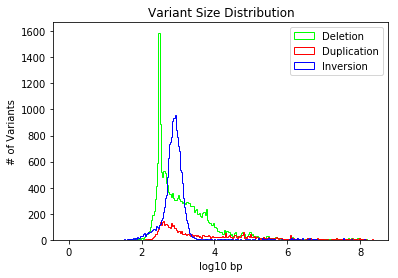

In [238]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

data1 = np.asarray(variants_to_plot[0])
data2 = np.asarray(variants_to_plot[1])
data3 = np.asarray(variants_to_plot[2])

data1 = np.log10(data1)
data2 = np.log10(data2)
data3 = np.log10(data3)

colors = [ 'lime', 'red', 'blue']

n_bins = 250
plot1 = plt.hist(data1, n_bins, histtype='step', stacked=True, fill=False, color='lime', label='Deletion')
plot2 = plt.hist(data2, n_bins, histtype='step', stacked=True, fill=False, color='red', label='Duplication')
plot3 = plt.hist(data3, n_bins, histtype='step', stacked=True, fill=False, color='blue', label='Inversion')
plt.ylabel('# of Variants')
plt.xlabel('log10 bp')
plt.title('Variant Size Distribution')
sv_category = ['Deletion', 'Duplication', 'Inversion']
plt.legend(sv_category)
# You can specify a rotation for the tick labels in degrees or with keywords.
#plt.xticks(data1, labels, rotation='vertical')


fig.tight_layout()
plt.savefig('size_dist.png')
plt.show()

sv_category = ['Deletion', 'Duplication', 'Inversion']


### Allele Frequency VS Variant Size


In [271]:
variant_lengths_frequency = []
for index , variant_type in enumerate(real_variants):
    variant_lengths_frequency.append([[],[]])
    for variant in variant_type:
        variant_lengths_frequency[index][0].append(np.absolute(variant[1]))
        variant_lengths_frequency[index][1].append(variant[2])
    
variants_to_plot_frequency = variant_lengths_frequency[0:3]



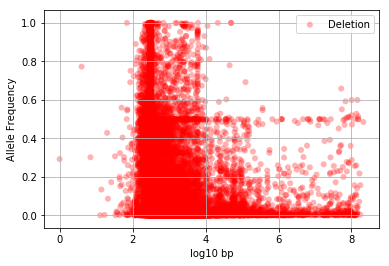

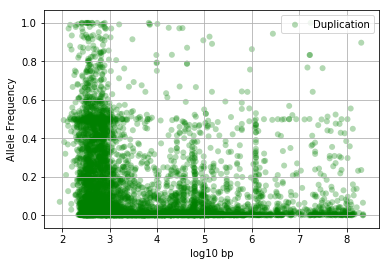

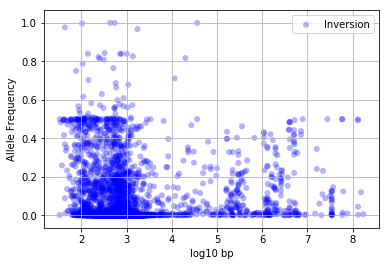

In [251]:

import matplotlib.pyplot as plt

color = ['red', 'green', 'blue']

fig, ax = plt.subplots()
variants = variants_to_plot_frequency[0]
x, y = np.log10(variants[0]), variants[1]
ax.scatter(x, y, c=color[0], label=sv_category[0],
           alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.ylabel('Allele Frequency')
plt.xlabel('log10 bp')
plt.savefig(sv_category[0] +'.freq.dist.png')
plt.show()



fig, ax = plt.subplots()
variants = variants_to_plot_frequency[1]
x, y = np.log10(variants[0]), variants[1]
ax.scatter(x, y, c=color[1], label=sv_category[1],
           alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.ylabel('Allele Frequency')
plt.xlabel('log10 bp')
plt.savefig(sv_category[1] +'.freq.dist.png')
plt.show()



fig, ax = plt.subplots()
variants = variants_to_plot_frequency[2]
x, y = np.log10(variants[0]), variants[1]
ax.scatter(x, y, c=color[2], label=sv_category[2],
           alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)
plt.ylabel('Allele Frequency')
plt.xlabel('log10 bp')
plt.savefig(sv_category[2] +'.freq.dist.png')
plt.show()




### # of Variants at Allele Frequency

In [273]:
variant_lengths = []
for index , variant_type in enumerate(real_variants):
    variant_lengths.append([])
    for variant in variant_type:
        variant_lengths[index].append(np.absolute(variant[2]))
    variant_lengths[index].sort()
    
variants_to_plot = variant_lengths[0:3]

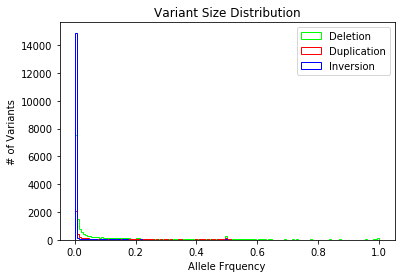

In [269]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

data1 = np.asarray(variants_to_plot[0])
data2 = np.asarray(variants_to_plot[1])
data3 = np.asarray(variants_to_plot[2])

data1 = data1
data2 = data2
data3 = data3

colors = [ 'lime', 'red', 'blue']

n_bins = 150
plot1 = plt.hist(data1, n_bins, histtype='step', stacked=True, fill=False, color='lime', label='Deletion')
plot2 = plt.hist(data2, n_bins, histtype='step', stacked=True, fill=False, color='red', label='Duplication')
plot3 = plt.hist(data3, n_bins, histtype='step', stacked=True, fill=False, color='blue', label='Inversion')
plt.ylabel('# of Variants')
plt.xlabel('Allele Frquency')
plt.title('Variant Size Distribution')
sv_category = ['Deletion', 'Duplication', 'Inversion']
plt.legend(sv_category)
# You can specify a rotation for the tick labels in degrees or with keywords.
#plt.xticks(data1, labels, rotation='vertical')


fig.tight_layout()
plt.savefig('freq_dist.png')
plt.show()

sv_category = ['Deletion', 'Duplication', 'Inversion']




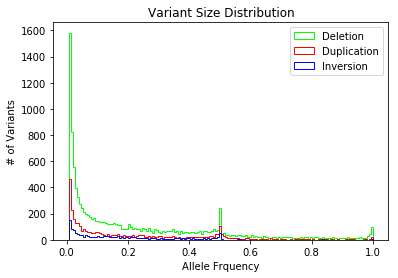

In [268]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

data1 = []
for i in variants_to_plot[0]:
    if i > 0.007:
        data1.append(i)

data2 = []
for i in variants_to_plot[1]:
    if i > 0.007:
        data2.append(i)


data3 = []
for i in variants_to_plot[2]:
    if i > 0.007:
        data3.append(i)
    

data1 = np.asarray(data1)
data2 = np.asarray(data2)
data3 = np.asarray(data3)


colors = [ 'lime', 'red', 'blue']

n_bins = 150
plot1 = plt.hist(data1, n_bins, histtype='step', stacked=True, fill=False, color='lime', label='Deletion')
plot2 = plt.hist(data2, n_bins, histtype='step', stacked=True, fill=False, color='red', label='Duplication')
plot3 = plt.hist(data3, n_bins, histtype='step', stacked=True, fill=False, color='blue', label='Inversion')
plt.ylabel('# of Variants')
plt.xlabel('Allele Frquency')
plt.title('Variant Size Distribution')
sv_category = ['Deletion', 'Duplication', 'Inversion']
plt.legend(sv_category)
# You can specify a rotation for the tick labels in degrees or with keywords.
#plt.xticks(data1, labels, rotation='vertical')


fig.tight_layout()
plt.savefig('freq_dist_cut_off.png')
plt.show()

sv_category = ['Deletion', 'Duplication', 'Inversion']
